In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy import stats
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score

In [3]:
#Loding parkinson's disease dataset
data = pd.read_excel('Parkisons Dataset 1 Final.xlsx')

In [4]:
# Display data types of columns
print("Data Types:")
print(data.dtypes)

Data Types:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [5]:
data = data.drop('name', axis=1)

In [6]:
#checking if there are missing value
print(data.isnull().sum())

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [7]:
# Calculate Z-scores for the entire dataset
z_scores = np.abs(stats.zscore(data))

# Define a threshold for outlier detection
threshold = 3

# Find outliers based on threshold
outliers = np.where(z_scores > threshold)

# Replace outliers with mean or median
for row_index, col_index in zip(*outliers):
    if row_index >= data.shape[0] or col_index >= data.shape[1]:
        continue  # Skip if the indices are out of bounds

    column = data.columns[col_index]
    value = data.iloc[row_index, col_index]

    if not pd.isnull(value):  # Skip if the value is already nullc
        if np.isnan(data[column].mean()):
            median_value = data[column].median()
            data.iloc[row_index, col_index] = median_value
        else:
            mean_value = data[column].mean()
            data.iloc[row_index, col_index] = mean_value

# Display the modified dataset
print(data)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [9]:
#checking if dataset is imbalanced or balanced
class_distribution = data['status'].value_counts()

print(class_distribution)

minority_class_percentage = (class_distribution.min() / len(data)) * 100
print(minority_class_percentage)

majority_class_percentage = (class_distribution.max() / len(data)) * 100
print(majority_class_percentage)

1    147
0     48
Name: status, dtype: int64
24.615384615384617
75.38461538461539


In [11]:
label_encoder = LabelEncoder()
# Encoding features
data = data.apply(label_encoder.fit_transform)

In [12]:
#since the dataset is imbalanced, smote is appiled to make it balanced.

X = data.drop('status', axis=1)
y = data['status']

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [13]:
#renaming smapled data
data = pd.concat([X_resampled, y_resampled], axis=1)

In [14]:
#checking if dataset is imbalanced or balanced
class_distribution = data['status'].value_counts()

print(class_distribution)

minority_class_percentage = (class_distribution.min() / len(data)) * 100
print(minority_class_percentage)

majority_class_percentage = (class_distribution.max() / len(data)) * 100
print(majority_class_percentage)

1    147
0    147
Name: status, dtype: int64
50.0
50.0


In [15]:
# finiding correlation
correlation_matrix = data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.873058      0.461730       -0.368799   
MDVP:Fhi(Hz)         0.873058      1.000000      0.257543       -0.223619   
MDVP:Flo(Hz)         0.461730      0.257543      1.000000       -0.566891   
MDVP:Jitter(%)      -0.368799     -0.223619     -0.566891        1.000000   
MDVP:Jitter(Abs)    -0.512316     -0.379628     -0.443649        0.845609   
MDVP:RAP            -0.239411     -0.116357     -0.504705        0.953085   
MDVP:PPQ            -0.366428     -0.192603     -0.541886        0.963883   
Jitter:DDP          -0.247720     -0.121397     -0.510199        0.952609   
MDVP:Shimmer        -0.207112     -0.148913     -0.375490        0.753948   
MDVP:Shimmer(dB)    -0.201070     -0.135377     -0.392855        0.774148   
Shimmer:APQ3        -0.145995     -0.116877     -0.298295        0.706082   
Shimmer:APQ5        -0.158664     -0.087372     -0.34882

In [16]:
#spiltting the data into test and train data
X = data.drop('status', axis=1) #status is the target column
y = data['status']

#taking 25% as test data and 75% as train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix (Training Data):
[[105   6]
 [ 10  99]]
Accuracy (Training Data): 0.9272727272727272
Precision (Training Data): 0.9278147939017505
Recall (Training Data): 0.9272727272727272
F1-Score (Training Data): 0.9272366373185165

Confusion Matrix (Test Data):
[[34  2]
 [ 3 35]]
Accuracy (Test Data): 0.9324324324324325
Precision (Test Data): 0.9327976625273923
Recall (Test Data): 0.9324324324324325
F1-Score (Test Data): 0.9324447735406638


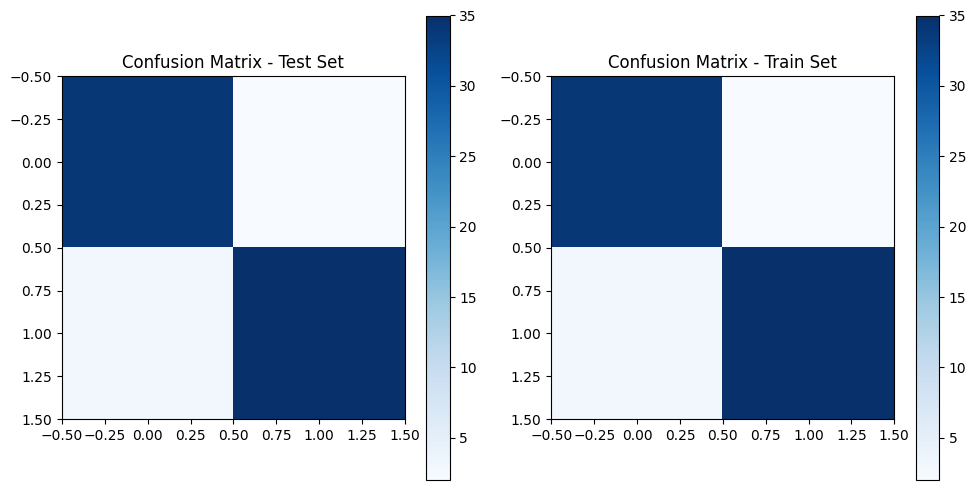

In [ ]:
#Logistic Regression
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data for Logistic Regression
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Precision, recall, and F1-score for training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Precision, recall, and F1-score for test data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Displaying results
print("Confusion Matrix (Training Data):")
print(train_conf_matrix)
print("Accuracy (Training Data):", train_accuracy)
print("Precision (Training Data):", train_precision)
print("Recall (Training Data):", train_recall)
print("F1-Score (Training Data):", train_f1)

print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Confusion Matrix - Train Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.tight_layout()
plt.show()


Training Metrics:
Accuracy: 0.9954545454545455
Precision: 1.0
Recall: 0.9908256880733946
F1 Score: 0.9953917050691244

Test Metrics:
Accuracy: 0.8918918918918919
Precision: 0.875
Recall: 0.9210526315789473
F1 Score: 0.8974358974358975

Confusion Matrix:
[[31  5]
 [ 3 35]]


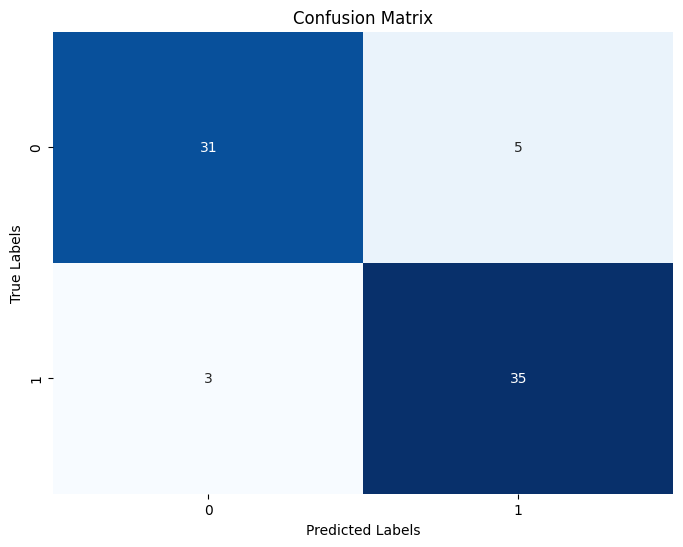

In [ ]:
#Gradient Boosting Algorithm

# Creating and fitting the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=42)
gb_clf.fit(X_train, y_train)

# Making predictions on the training set
train_predictions = gb_clf.predict(X_train)

# Calculating training set accuracy, precision, recall, and F1 score
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

# Making predictions on the test set
predictions = gb_clf.predict(X_test)

# Calculating test set accuracy, precision, recall, and F1 score
test_accuracy_gb = accuracy_score(y_test, predictions)
test_precision_gb = precision_score(y_test, predictions)
test_recall_gb = recall_score(y_test, predictions)
test_f1_gb = f1_score(y_test, predictions)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy_gb}")
print(f"Precision: {test_precision_gb}")
print(f"Recall: {test_recall_gb}")
print(f"F1 Score: {test_f1_gb }")

# Generating confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix (Training Data):
[[111   0]
 [  0 109]]
Accuracy (Training Data): 1.0
Precision (Training Data): 1.0
Recall (Training Data): 1.0
F1-Score (Training Data): 1.0

Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


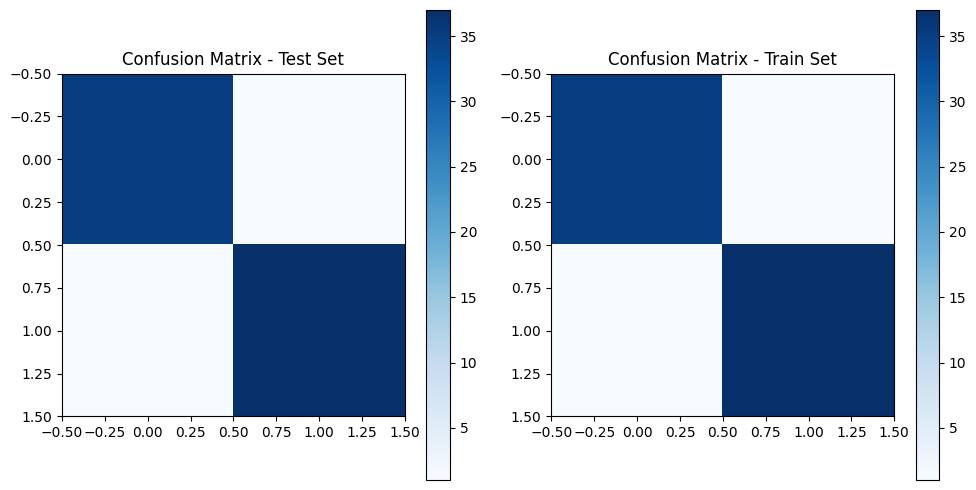

In [ ]:
#Random Forest Classifier
# spiltting the data into test and train data
X = data.drop('status', axis=1) #status is the target column
y = data['status']

# taking 25% as test data and 75% as train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data for Random Forest
train_predictions = rf_classifier.predict(X_train)
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Precision, recall, and F1-score for training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Precision, recall, and F1-score for test data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Displaying results
print("Confusion Matrix (Training Data):")
print( train_conf_matrix)
print("Accuracy (Training Data):", train_accuracy)
print("Precision (Training Data):", train_precision)
print("Recall (Training Data):", train_recall)
print("F1-Score (Training Data):", train_f1)

print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Confusion Matrix - Train Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.tight_layout()
plt.show()

Confusion Matrix (Training Data):
[[100  11]
 [ 32  77]]
Accuracy (Training Data): 0.8045454545454546
Precision (Training Data): 0.8157541322314049
Recall (Training Data): 0.8045454545454546
F1-Score (Training Data): 0.8025733932671326

Confusion Matrix (Test Data):
[[30  6]
 [ 3 35]]
Accuracy (Test Data): 0.8783783783783784
Precision (Test Data): 0.8806256367231976
Recall (Test Data): 0.8783783783783784
F1-Score (Test Data): 0.8780437013788692


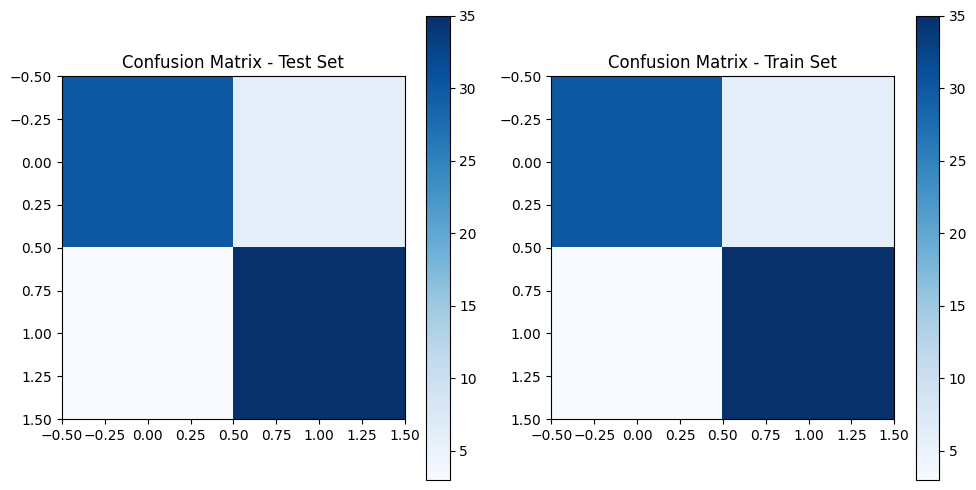

In [ ]:
#SVM Classifier

# Assuming the features are in columns 'feature1' and 'feature2', and the labels are in the 'label' column
X = data[['HNR', 'PPE']].values
y = data['status'].values

# Splitting dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating an instance of the SVM classifier
clf = svm.SVC()

# Training the SVM classifier
clf.fit(X_train, y_train)
# Calculating precision, recall, f1_score of train and test data for SVM
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Precision, recall, and F1-score for training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Precision, recall, and F1-score for test data
test_accuracy_svm = accuracy_score(y_test, test_predictions)
test_precision_svm = precision_score(y_test, test_predictions, average='weighted')
test_recall_svm = recall_score(y_test, test_predictions, average='weighted')
test_f1_svm = f1_score(y_test, test_predictions, average='weighted')

# Displaying results
print("Confusion Matrix (Training Data):")
print(train_conf_matrix)
print("Accuracy (Training Data):", train_accuracy)
print("Precision (Training Data):", train_precision)
print("Recall (Training Data):", train_recall)
print("F1-Score (Training Data):", train_f1)

print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy_svm)
print("Precision (Test Data):", test_precision_svm)
print("Recall (Test Data):", test_recall_svm)
print("F1-Score (Test Data):", test_f1_svm)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Confusion Matrix - Train Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.tight_layout()
plt.show()

Confusion Matrix (Training Data):
[[113   0]
 [  0 110]]
Accuracy (Training Data): 1.0
Precision (Training Data): 1.0
Recall (Training Data): 1.0
F1-Score (Training Data): 1.0

Confusion Matrix (Test Data):
[[32  2]
 [ 0 37]]
Accuracy (Test Data): 0.971830985915493
Precision (Test Data): 0.9732755507403394
Recall (Test Data): 0.971830985915493
F1-Score (Test Data): 0.9717748275939528


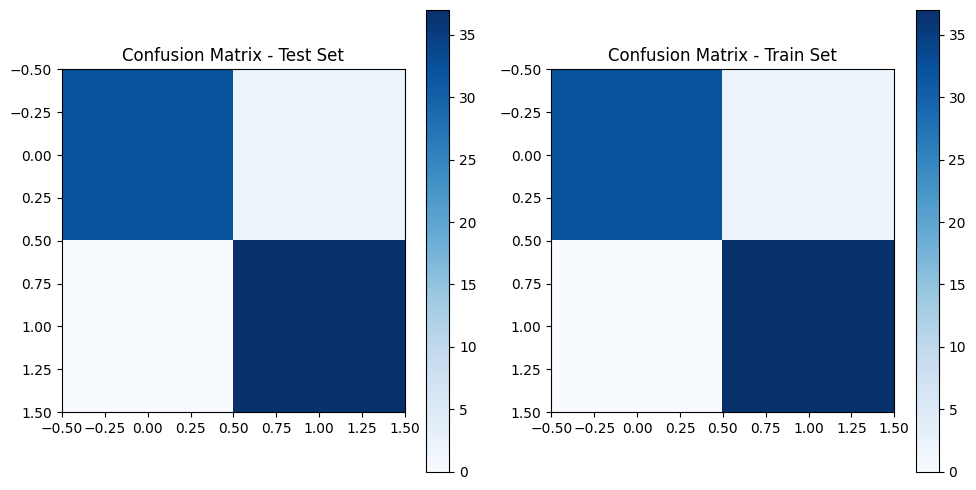

In [ ]:
#Decision Tree classifier
# Creating a decision tree classifier
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)
# Training the classifier
clf.fit(X_train, y_train)

# predictions on the test set
y_pred = clf.predict(X_test)

# Calculating precision, recall, f1_score of train and test data for Decision Tree
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Precision, recall, and F1-score for training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Precision, recall, and F1-score for test data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Displaying results
print("Confusion Matrix (Training Data):")
print(train_conf_matrix)
print("Accuracy (Training Data):", train_accuracy)
print("Precision (Training Data):", train_precision)
print("Recall (Training Data):", train_recall)
print("F1-Score (Training Data):", train_f1)

print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Confusion Matrix - Train Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.tight_layout()
plt.show()

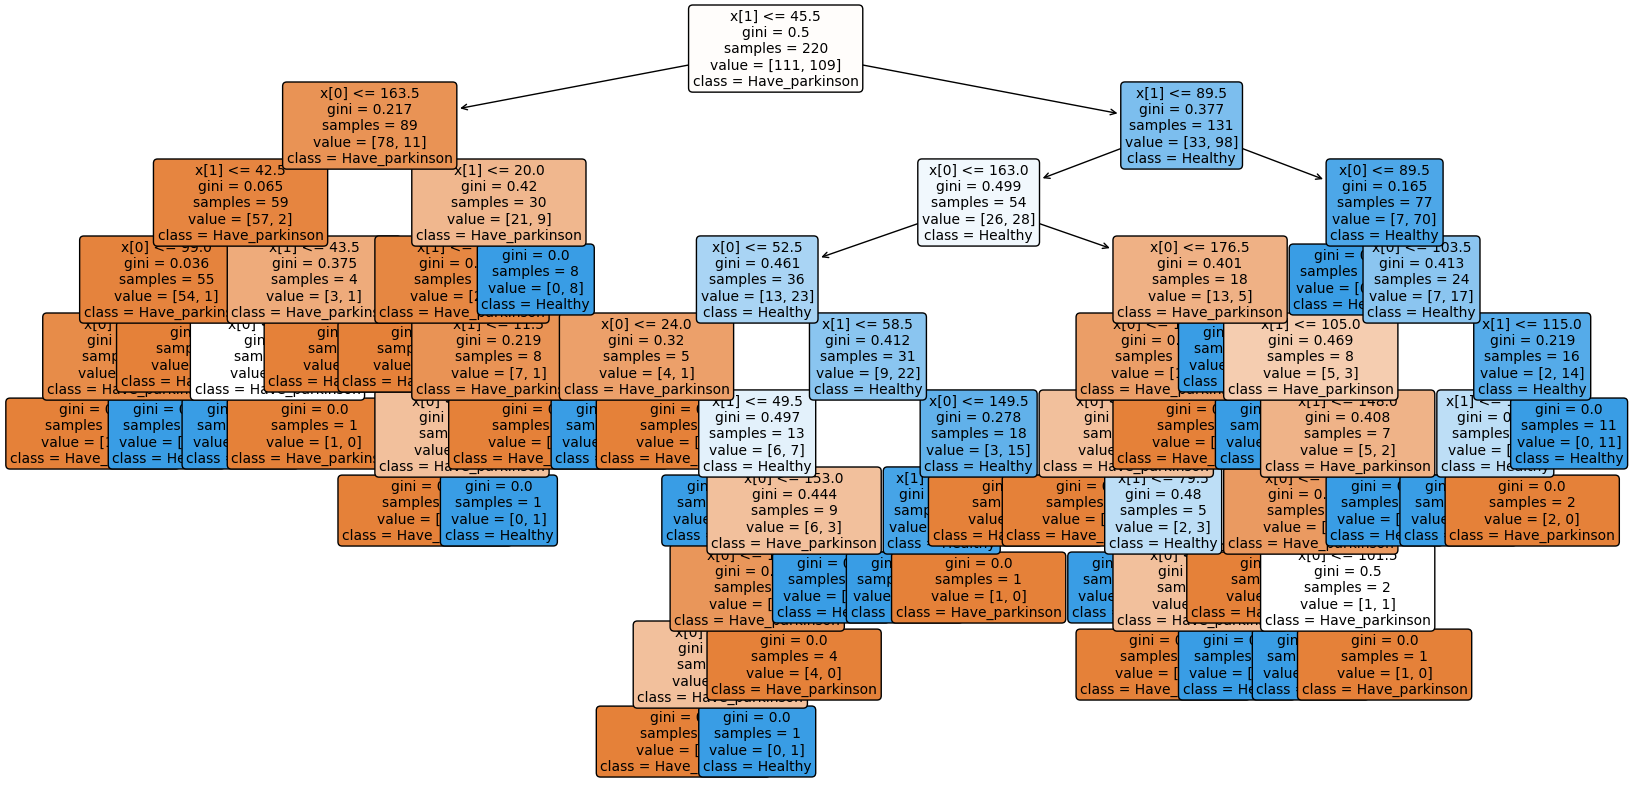

In [ ]:
#plotting the Decision Tree
# class names for your problem
class_names = ["Have_parkinson", "Healthy"]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, class_names=class_names, rounded=True, fontsize=10)
plt.show()


In [ ]:
# Print the maximum depth of the decision tree
max_depth = clf.tree_.max_depth
print(f"Maximum Depth of the Decision Tree: {max_depth}")

Maximum Depth of the Decision Tree: 9


Confusion Matrix (Training Data):
[[113   0]
 [  0 113]]
Accuracy (Training Data): 1.0
Precision (Training Data): 1.0
Recall (Training Data): 1.0
F1-Score (Training Data): 1.0

Confusion Matrix (Test Data):
[[31  3]
 [ 4 30]]
Accuracy (Test Data): 0.8970588235294118
Precision (Test Data): 0.8974025974025973
Recall (Test Data): 0.8970588235294118
F1-Score (Test Data): 0.8970365563486913


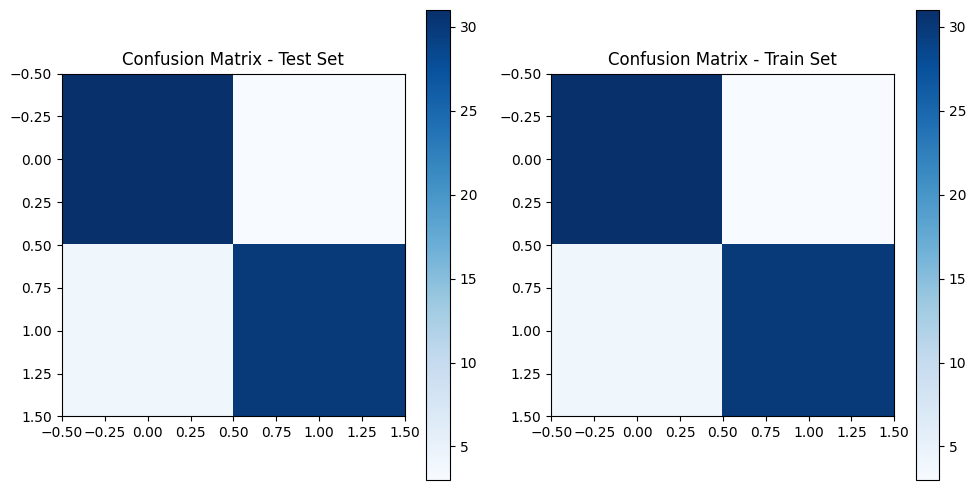

In [27]:
#AdaBoost Classifier

#spiltting the data into test and train data
X = data.drop('status', axis=1)
y = data['status']

ada_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# Fit the AdaBoost classifier to the training data
ada_classifier.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_predictions = ada_classifier.predict(X_train)
test_predictions = ada_classifier.predict(X_test)

# Confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Accuaracy, Precision, recall, and F1-score for training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Accuracy, Precision, recall, and F1-score for test data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Displaying results
print("Confusion Matrix (Training Data):")
print(train_conf_matrix)
print("Accuracy (Training Data):", train_accuracy)
print("Precision (Training Data):", train_precision)
print("Recall (Training Data):", train_recall)
print("F1-Score (Training Data):", train_f1)

print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Confusion Matrix - Train Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# 'status' is the target variable
X = data.drop('status', axis=1)
y = data['status']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Calculate mean absolute SHAP values across all samples
shap_values_abs = np.abs(shap_values)
mean_absolute_shap = np.mean(shap_values_abs, axis=0)

feature_names = X_test.columns

# Create a DataFrame to hold feature names and their mean absolute SHAP values
shap_summary_df = pd.DataFrame({'Feature': feature_names, 'Mean Absolute SHAP': mean_absolute_shap.mean(axis=0)})
shap_summary_df = shap_summary_df.sort_values(by='Mean Absolute SHAP', ascending=False)

# Print all attributes with their mean absolute SHAP values
for idx, row in shap_summary_df.iterrows():
    print(f"Feature: {row['Feature']}, Mean Absolute SHAP: {row['Mean Absolute SHAP']}")


Feature: spread1, Mean Absolute SHAP: 0.08164874239725896
Feature: PPE, Mean Absolute SHAP: 0.06746708579436571
Feature: spread2, Mean Absolute SHAP: 0.04533262652123469
Feature: MDVP:Fo(Hz), Mean Absolute SHAP: 0.03877279480393632
Feature: MDVP:Fhi(Hz), Mean Absolute SHAP: 0.028631340843669098
Feature: D2, Mean Absolute SHAP: 0.02836132851470737
Feature: MDVP:APQ, Mean Absolute SHAP: 0.028159098966791397
Feature: Shimmer:APQ5, Mean Absolute SHAP: 0.027357166349153722
Feature: DFA, Mean Absolute SHAP: 0.02176800657010204
Feature: MDVP:Shimmer, Mean Absolute SHAP: 0.021525213664773092
Feature: MDVP:Shimmer(dB), Mean Absolute SHAP: 0.01956249559110742
Feature: MDVP:Jitter(Abs), Mean Absolute SHAP: 0.016534900595886578
Feature: NHR, Mean Absolute SHAP: 0.015035220984395506
Feature: MDVP:Flo(Hz), Mean Absolute SHAP: 0.012753812658743424
Feature: Jitter:DDP, Mean Absolute SHAP: 0.012127557420141792
Feature: Shimmer:DDA, Mean Absolute SHAP: 0.011984940348578924
Feature: MDVP:RAP, Mean Absolu

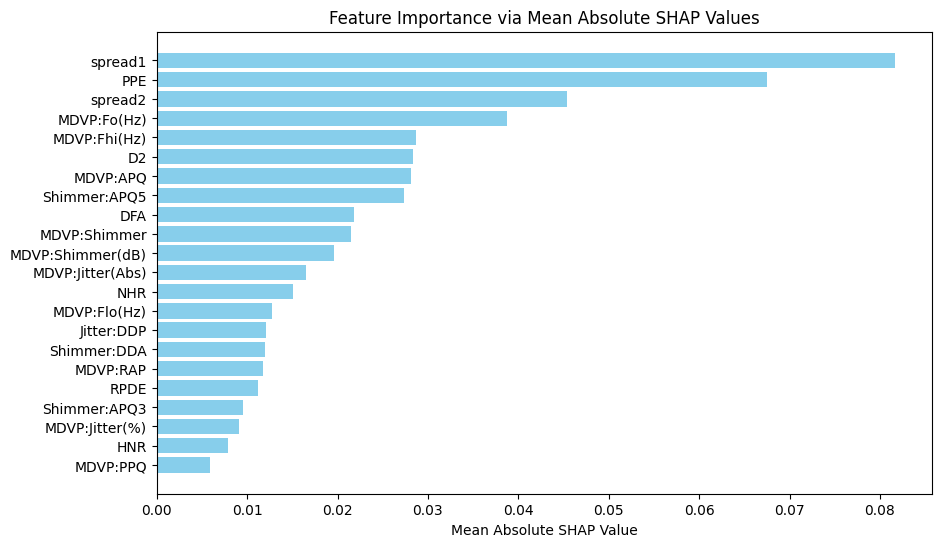

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean Absolute SHAP'], color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance via Mean Absolute SHAP Values')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [ ]:
# Extract feature names from the top 1 features
top_feature_names = ['spread1']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[29  7]
 [ 9 29]]
Accuracy (Test Data): 0.7837837837837838
Precision (Test Data): 0.784929666508614
Recall (Test Data): 0.7837837837837838
F1-Score (Test Data): 0.7837837837837838


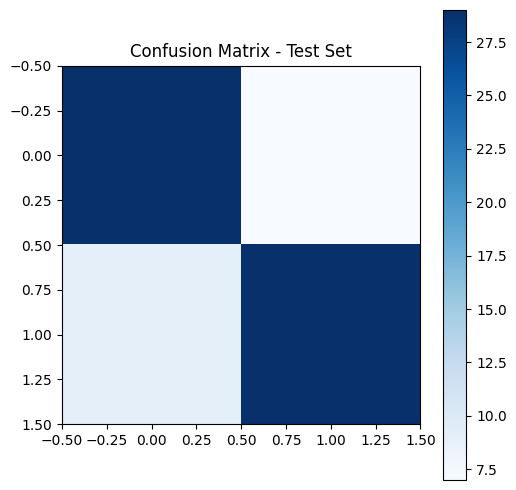

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy1 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy1)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 2 features
top_feature_names = ['spread1','PPE']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[26 10]
 [ 4 34]]
Accuracy (Test Data): 0.8108108108108109
Precision (Test Data): 0.8184275184275184
Recall (Test Data): 0.8108108108108109
F1-Score (Test Data): 0.8091328579133457


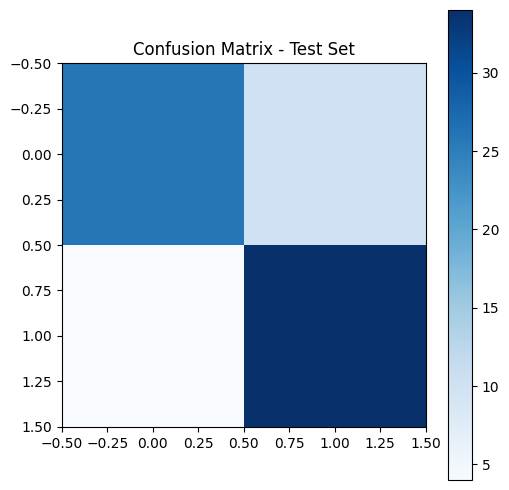

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy2 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy2)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 3 features
top_feature_names = ['spread1','PPE','spread2']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[26 10]
 [ 2 36]]
Accuracy (Test Data): 0.8378378378378378
Precision (Test Data): 0.8536175927480276
Recall (Test Data): 0.8378378378378378
F1-Score (Test Data): 0.8354247104247104


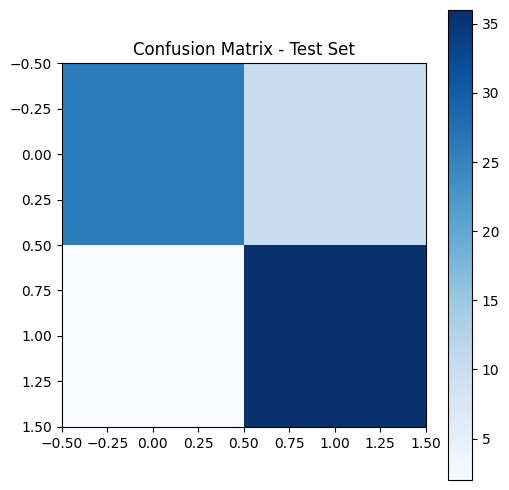

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy3 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy3)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 4 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[31  5]
 [ 3 35]]
Accuracy (Test Data): 0.8918918918918919
Precision (Test Data): 0.8928855325914148
Recall (Test Data): 0.8918918918918919
F1-Score (Test Data): 0.8917334917334917


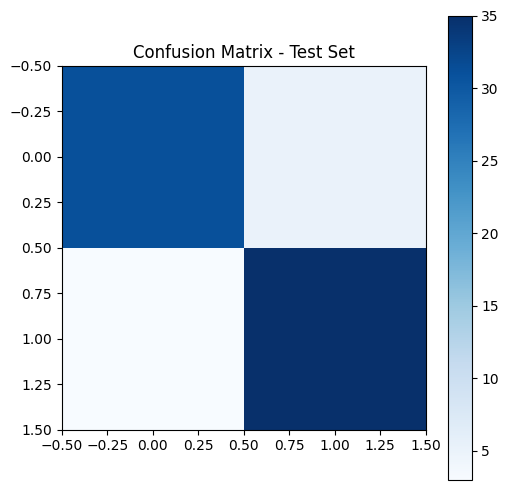

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy4 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy4)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 5 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[33  3]
 [ 2 36]]
Accuracy (Test Data): 0.9324324324324325
Precision (Test Data): 0.9326997326997326
Recall (Test Data): 0.9324324324324325
F1-Score (Test Data): 0.932395354930566


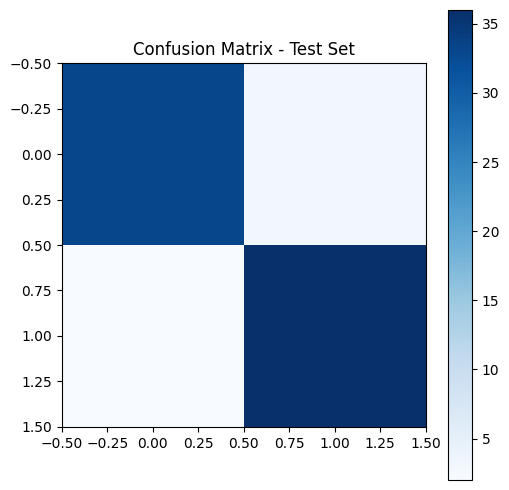

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy5 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy5)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 6 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


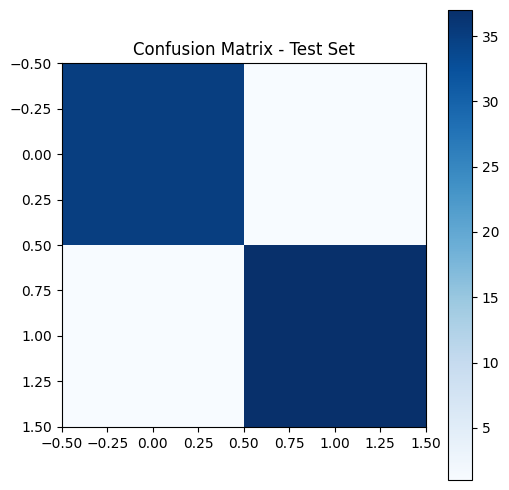

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy6 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy6)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 7 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 0 38]]
Accuracy (Test Data): 0.9864864864864865
Precision (Test Data): 0.9868329868329868
Recall (Test Data): 0.9864864864864865
F1-Score (Test Data): 0.986479070986113


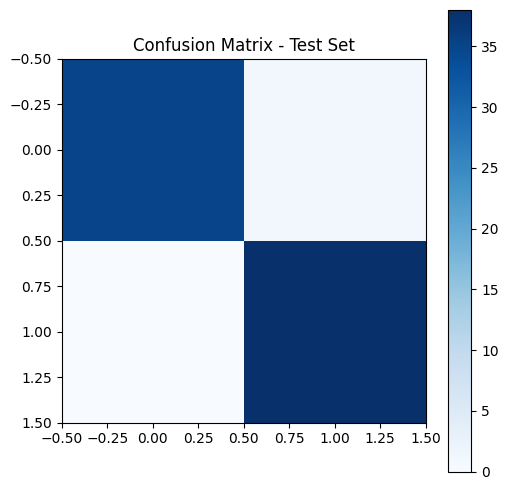

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy7 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy7)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 8 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 0 38]]
Accuracy (Test Data): 0.9864864864864865
Precision (Test Data): 0.9868329868329868
Recall (Test Data): 0.9864864864864865
F1-Score (Test Data): 0.986479070986113


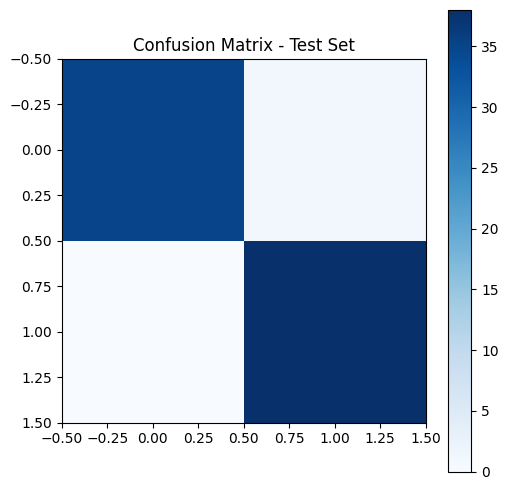

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy8 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy8)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 9 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 0 38]]
Accuracy (Test Data): 0.9864864864864865
Precision (Test Data): 0.9868329868329868
Recall (Test Data): 0.9864864864864865
F1-Score (Test Data): 0.986479070986113


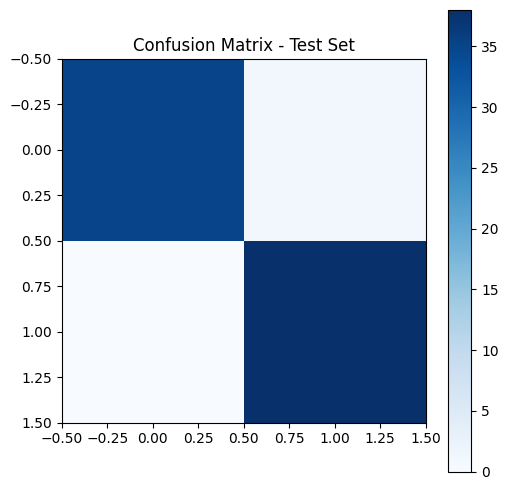

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy9 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy9)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 10 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


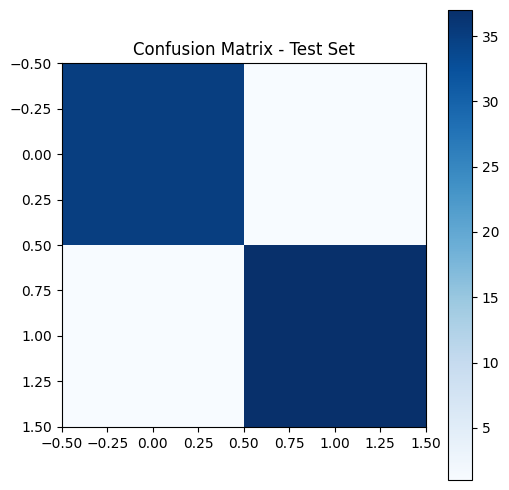

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy10 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy10)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 11 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


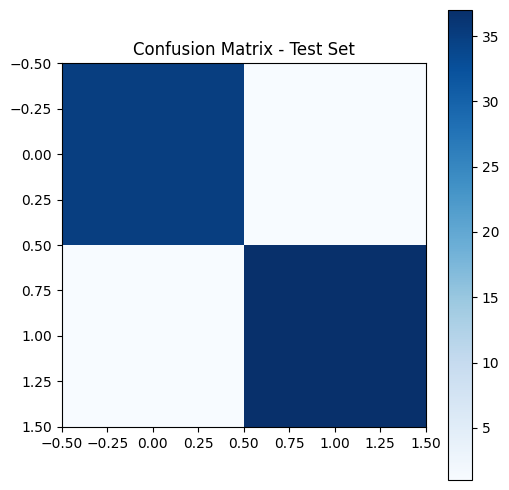

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy11 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy11)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 12 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


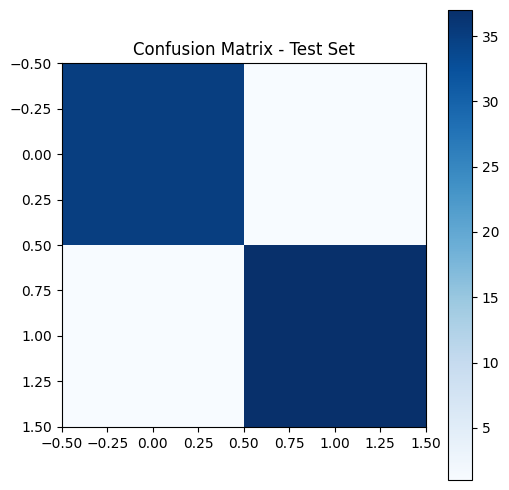

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy12 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy12)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 13 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


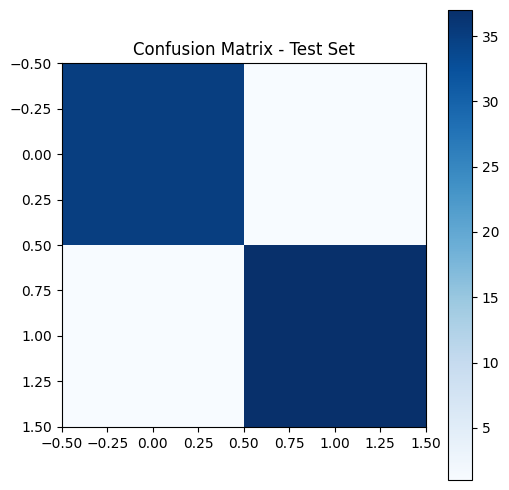

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy13 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy13)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 14 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


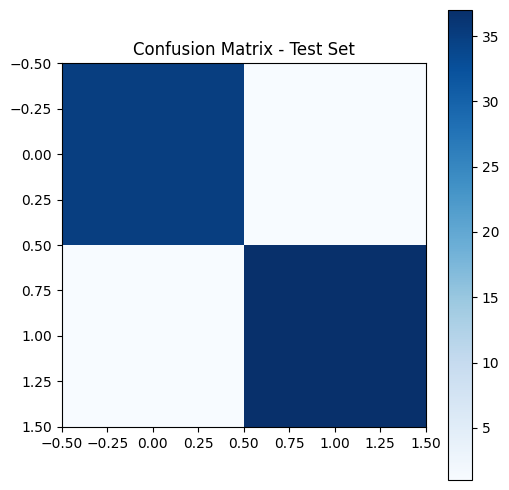

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy14 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy14)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 15 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


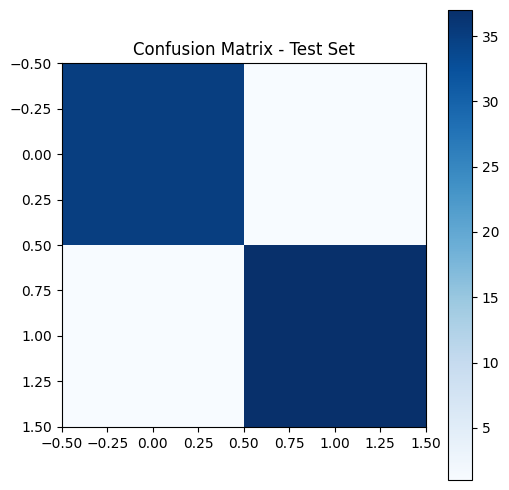

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy15 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy15)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 16 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP','NHR']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


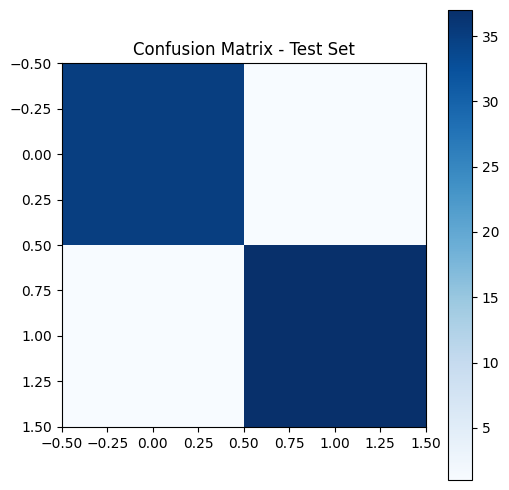

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy16 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy16)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 17 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP','NHR','Shimmer:DDA']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


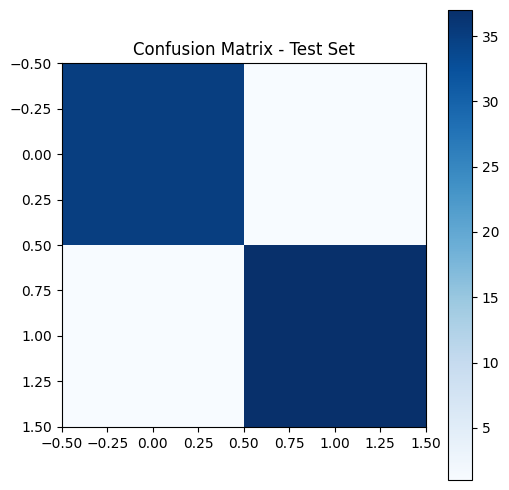

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy17 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy17)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 18 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP','NHR','Shimmer:DDA','MDVP:Jitter(%)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


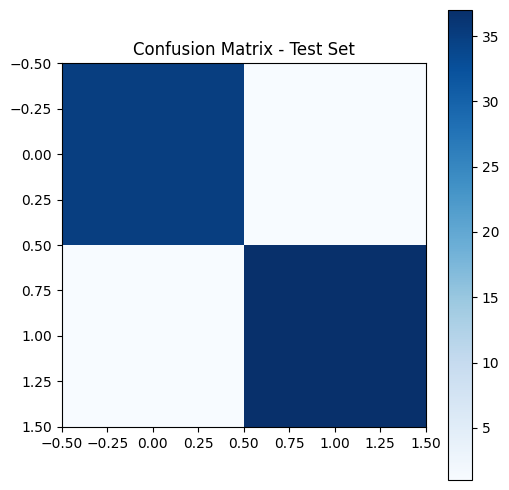

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy18 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy18)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 19 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP','NHR','Shimmer:DDA','MDVP:Jitter(%)','RPDE']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


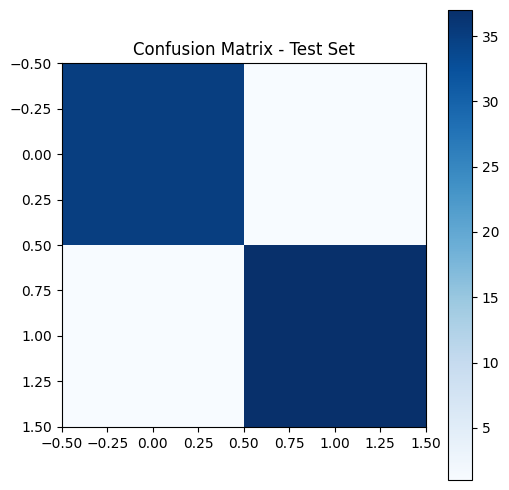

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy19 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy19)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 20 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP','NHR','Shimmer:DDA','MDVP:Jitter(%)','RPDE','MDVP:Jitter(Abs)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


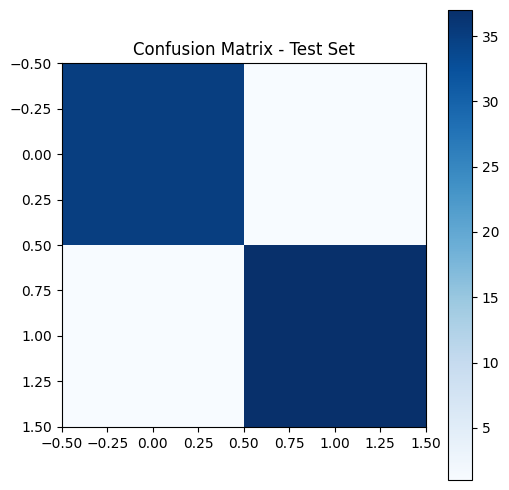

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy20 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy20)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 21 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP','NHR','Shimmer:DDA','MDVP:Jitter(%)','RPDE','MDVP:Jitter(Abs)','MDVP:PPQ']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


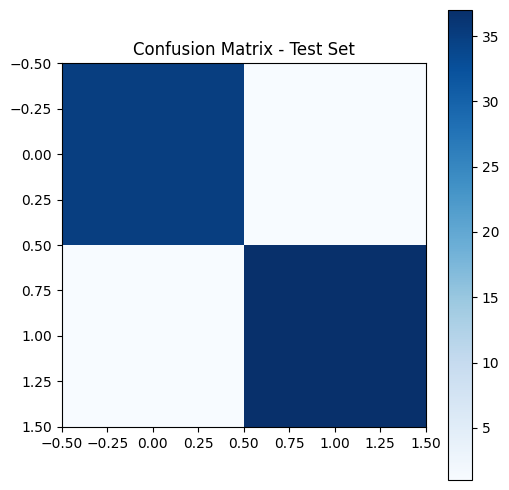

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy21 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy21)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 22 features
top_feature_names = ['spread1','PPE','spread2', 'MDVP:APQ','D2','MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)','MDVP:Shimmer','Shimmer:APQ5','DFA','MDVP:RAP', 'Shimmer:APQ3','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','Jitter:DDP','NHR','Shimmer:DDA','MDVP:Jitter(%)','RPDE','MDVP:Jitter(Abs)','MDVP:PPQ','HNR']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


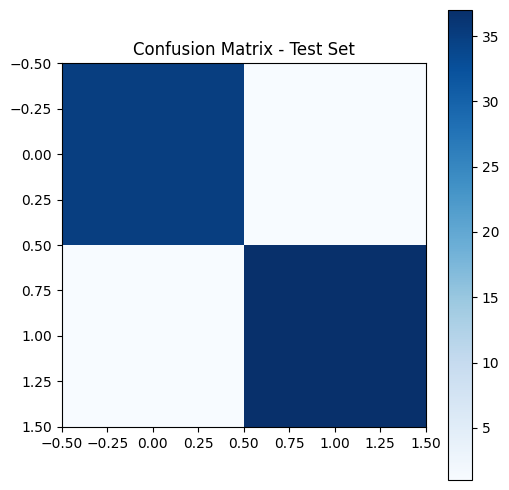

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy22 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy22)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

0.7837837837837838 0.8108108108108109 0.8378378378378378 0.8918918918918919 0.9324324324324325 0.972972972972973 0.9864864864864865 0.9864864864864865 0.9864864864864865 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973


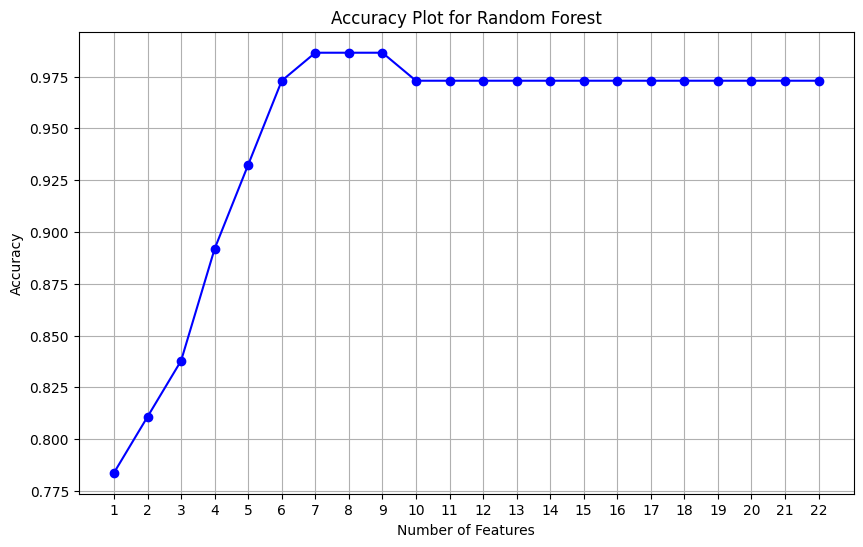

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of 22 accuracy values
accuracies = [test_accuracy1,test_accuracy2,test_accuracy3,test_accuracy4,test_accuracy5,test_accuracy6,test_accuracy7,test_accuracy8,test_accuracy9,test_accuracy10,test_accuracy11,test_accuracy12,test_accuracy13,test_accuracy14,test_accuracy15,test_accuracy16, test_accuracy17, test_accuracy18, test_accuracy19, test_accuracy20, test_accuracy21, test_accuracy22]
print(test_accuracy1,test_accuracy2,test_accuracy3,test_accuracy4,test_accuracy5,test_accuracy6,test_accuracy7,test_accuracy8,test_accuracy9,test_accuracy10,test_accuracy11,test_accuracy12,test_accuracy13,test_accuracy14,test_accuracy15,test_accuracy16, test_accuracy17, test_accuracy18, test_accuracy19, test_accuracy20, test_accuracy21, test_accuracy22)
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 23), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy Plot for Random Forest')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks(range(1, 23, 1))
plt.grid(True)
plt.show()


# **LIME Analysis**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=679bd806e3187429d65146a1d591d44e3443062b464860c01eee7c3bc6652508
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
import lime
import lime.lime_tabular
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# assume 'target' is the target variable
X = data.drop('status', axis=1)
y = data['status']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create and train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns.tolist(), class_names=['status'], discretize_continuous=True)

# predict the label of a particular data point
row_to_predict = 0
predictions = model.predict(X_test.iloc[[row_to_predict]].values.reshape(1, X_test.shape[1]))

# create Lime explainer for this particular prediction
exp = explainer.explain_instance(X_test.iloc[row_to_predict], model.predict_proba, num_features=X.shape[1])

# visualize Lime explainer results
exp.show_in_notebook(show_table=True)
plt.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
# Extract feature names from the top 1 features
top_feature_names = ['PPE']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[25 11]
 [ 6 32]]
Accuracy (Test Data): 0.7702702702702703
Precision (Test Data): 0.7744774031345674
Recall (Test Data): 0.7702702702702703
F1-Score (Test Data): 0.7687886891866992


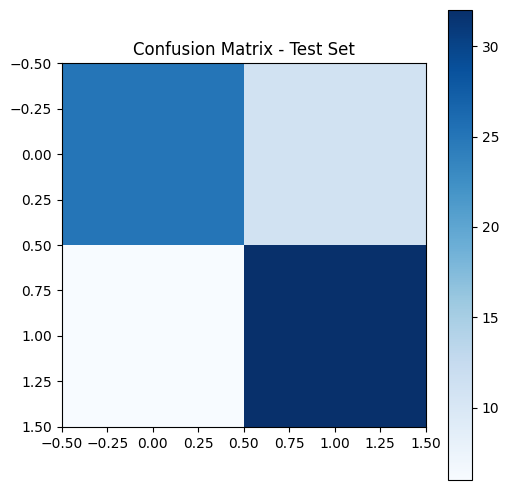

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy1 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy1)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 2 features
top_feature_names = ['PPE','spread1']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[28  8]
 [ 4 34]]
Accuracy (Test Data): 0.8378378378378378
Precision (Test Data): 0.8413770913770914
Recall (Test Data): 0.8378378378378378
F1-Score (Test Data): 0.8371224165341813


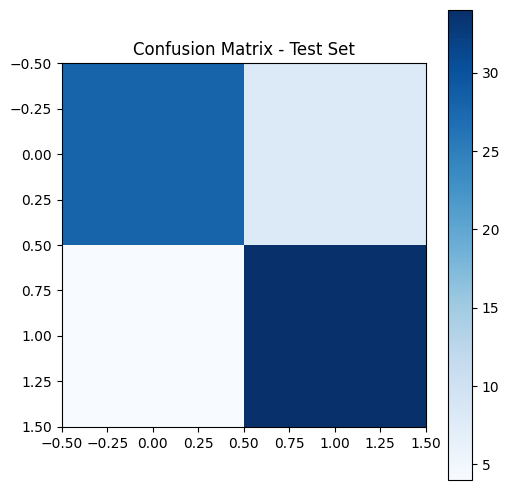

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy2 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy2)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 3 features
top_feature_names = ['PPE','spread1','D2']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[31  5]
 [ 2 36]]
Accuracy (Test Data): 0.9054054054054054
Precision (Test Data): 0.9078923713070055
Recall (Test Data): 0.9054054054054054
F1-Score (Test Data): 0.9051451010724538


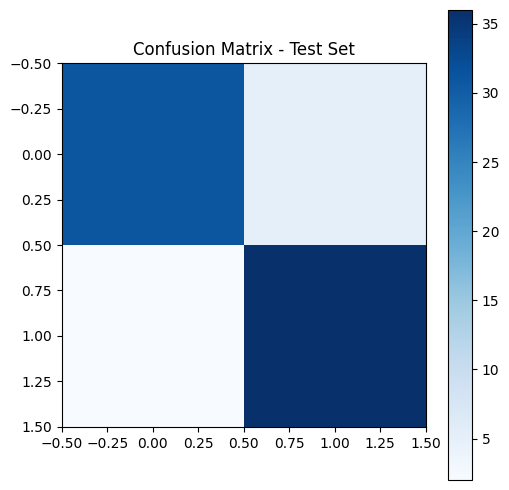

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy3 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy3)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 4 features
top_feature_names = ['PPE','spread1','D2','spread2']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[29  7]
 [ 2 36]]
Accuracy (Test Data): 0.8783783783783784
Precision (Test Data): 0.885018551935281
Recall (Test Data): 0.8783783783783784
F1-Score (Test Data): 0.8775940119223702


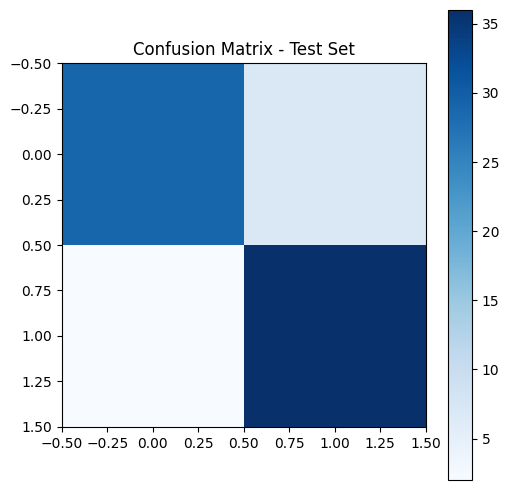

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy4 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy4)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 5 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[32  4]
 [ 0 38]]
Accuracy (Test Data): 0.9459459459459459
Precision (Test Data): 0.9510939510939511
Recall (Test Data): 0.9459459459459459
F1-Score (Test Data): 0.9457074721780604


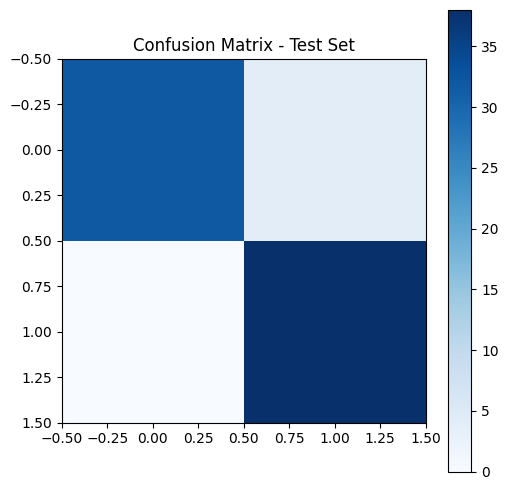

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy5 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy5)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 6 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[32  4]
 [ 0 38]]
Accuracy (Test Data): 0.9459459459459459
Precision (Test Data): 0.9510939510939511
Recall (Test Data): 0.9459459459459459
F1-Score (Test Data): 0.9457074721780604


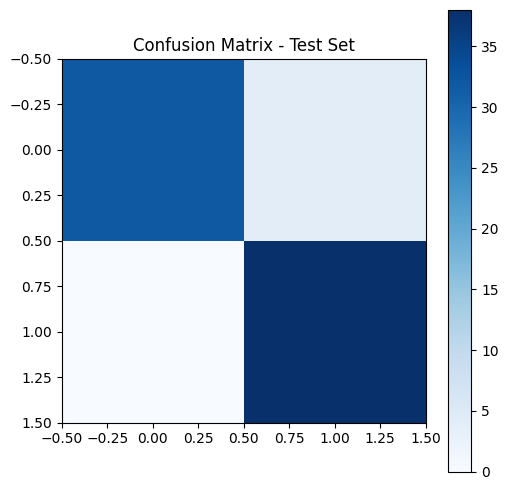

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy6 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy6)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 7 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[34  2]
 [ 0 38]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.9743243243243243
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.9729333729333728


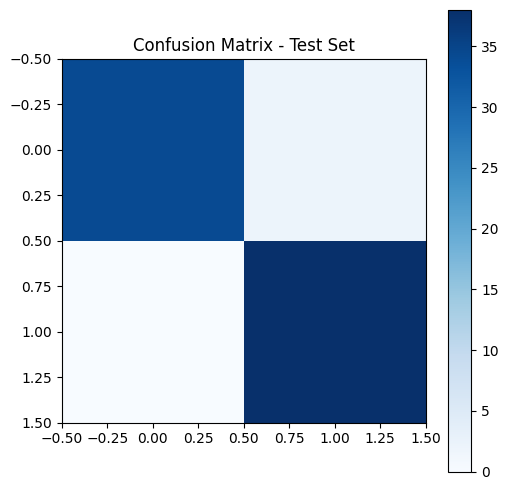

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy7 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy7)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 8 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 0 38]]
Accuracy (Test Data): 0.9864864864864865
Precision (Test Data): 0.9868329868329868
Recall (Test Data): 0.9864864864864865
F1-Score (Test Data): 0.986479070986113


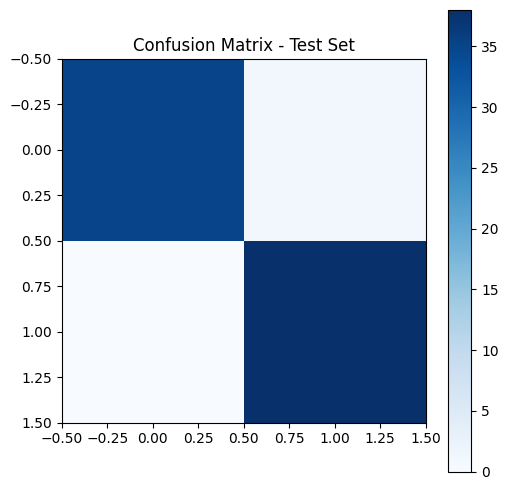

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy8 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy8)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 9 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 0 38]]
Accuracy (Test Data): 0.9864864864864865
Precision (Test Data): 0.9868329868329868
Recall (Test Data): 0.9864864864864865
F1-Score (Test Data): 0.986479070986113


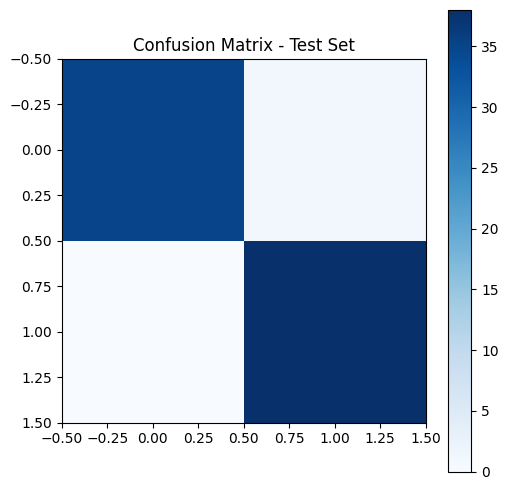

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy9 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy9)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 10 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 0 38]]
Accuracy (Test Data): 0.9864864864864865
Precision (Test Data): 0.9868329868329868
Recall (Test Data): 0.9864864864864865
F1-Score (Test Data): 0.986479070986113


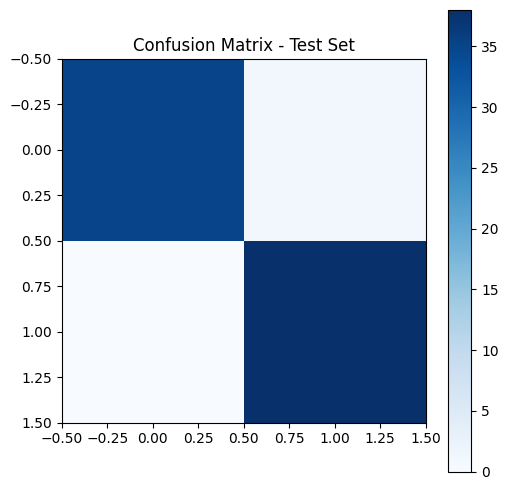

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy10 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy10)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 11 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


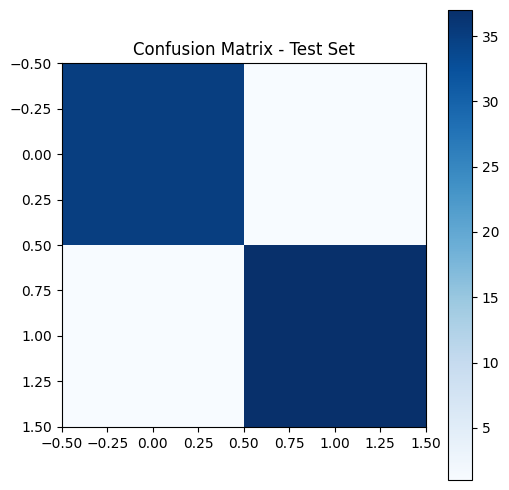

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy11 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy11)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 12 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


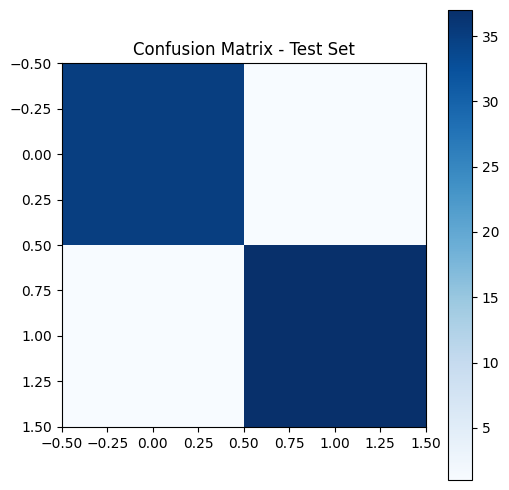

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy12 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy12)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 13 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


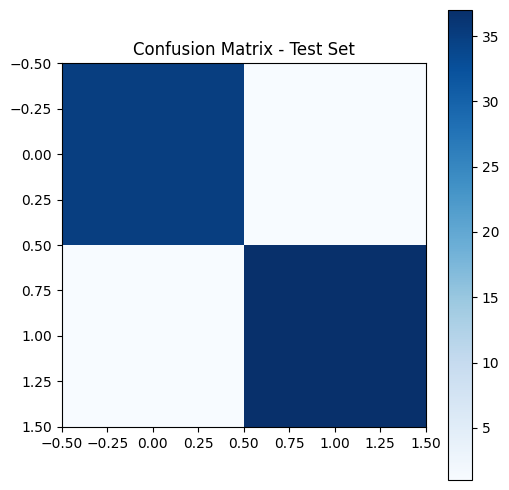

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy13 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy13)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 14 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 0 38]]
Accuracy (Test Data): 0.9864864864864865
Precision (Test Data): 0.9868329868329868
Recall (Test Data): 0.9864864864864865
F1-Score (Test Data): 0.986479070986113


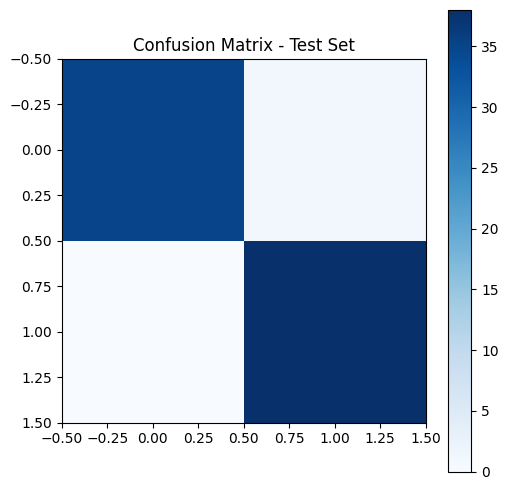

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy14 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy14)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 15 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


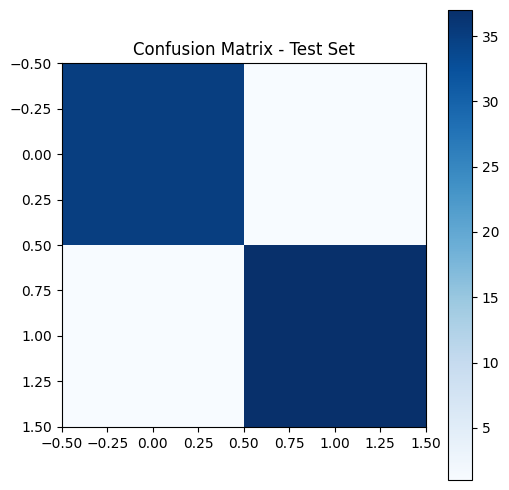

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy15= accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy15)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 16 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


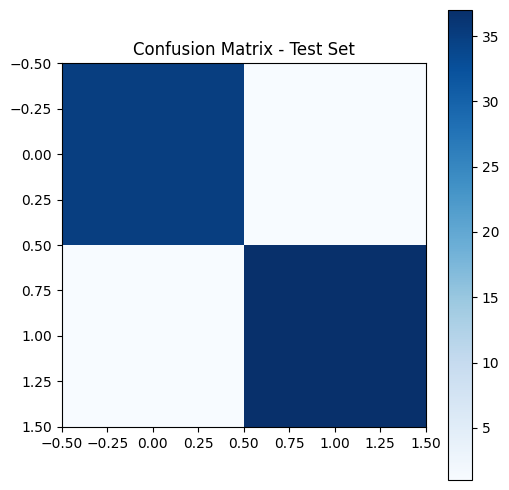

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy16 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy16)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 17 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ','MDVP:Fhi(Hz)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


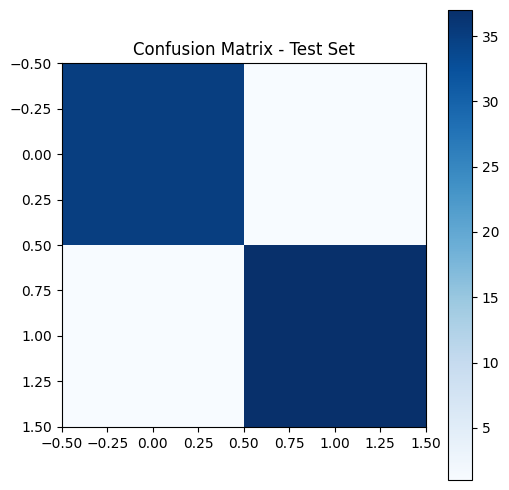

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy17 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy17)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 18 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ','MDVP:Fhi(Hz)','MDVP:Shimmer(dB)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


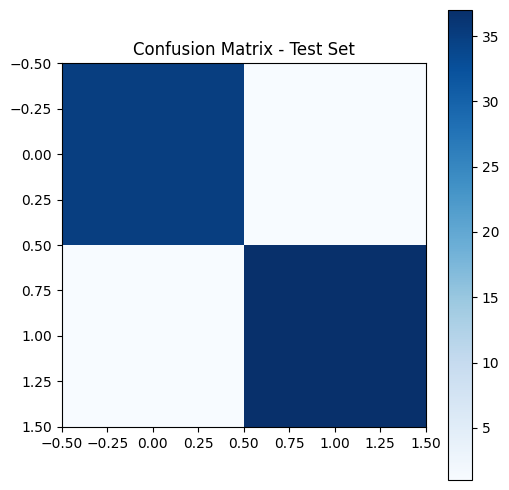

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy18 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy18)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 19 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ','MDVP:Fhi(Hz)','MDVP:Shimmer(dB)','MDVP:Flo(Hz)']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


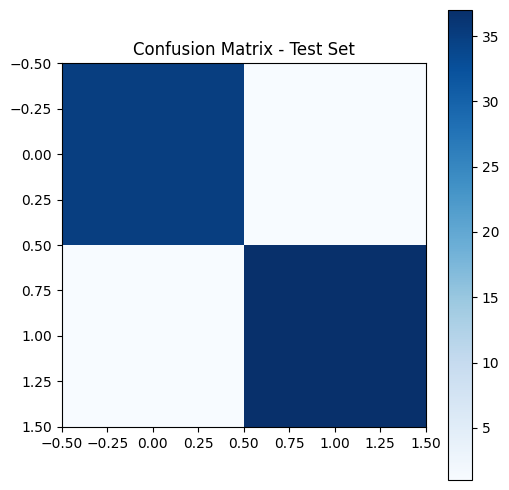

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy19 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy19)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 20 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ','MDVP:Fhi(Hz)','MDVP:Shimmer(dB)','MDVP:Flo(Hz)','Shimmer:APQ3']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


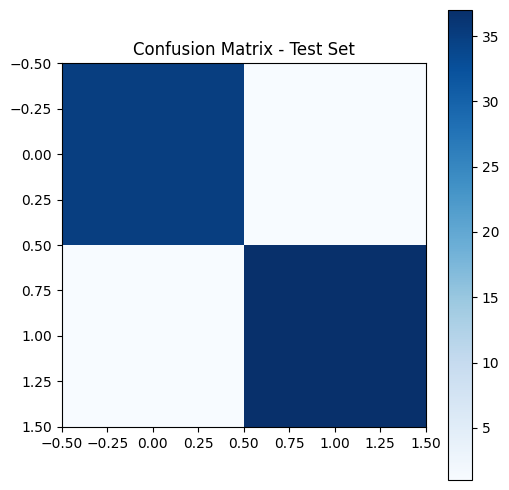

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy20 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy20)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 21 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ','MDVP:Fhi(Hz)','MDVP:Shimmer(dB)','MDVP:Flo(Hz)','Shimmer:APQ3','Shimmer:DDA']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


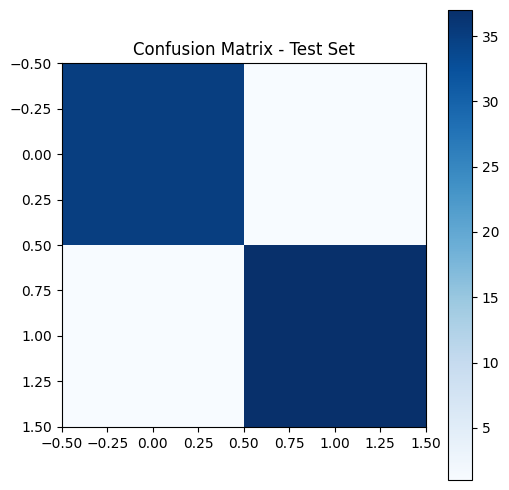

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy21 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy21)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
# Extract feature names from the top 22 features
top_feature_names = ['PPE','spread1','D2','spread2','MDVP:Fo(Hz)','NHR','MDVP:Jitter(Abs)','DFA','Jitter:DDP','HNR','RPDE','MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ','MDVP:Fhi(Hz)','MDVP:Shimmer(dB)','MDVP:Flo(Hz)','Shimmer:APQ3','Shimmer:DDA','MDVP:PPQ']

X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train= X_train[top_feature_names]
X_test = X_test[top_feature_names]


Confusion Matrix (Test Data):
[[35  1]
 [ 1 37]]
Accuracy (Test Data): 0.972972972972973
Precision (Test Data): 0.972972972972973
Recall (Test Data): 0.972972972972973
F1-Score (Test Data): 0.972972972972973


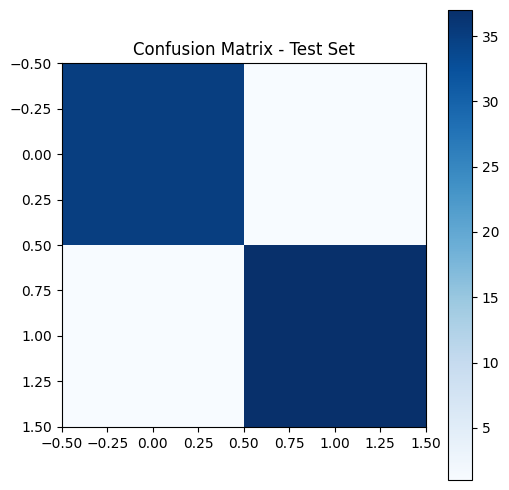

In [ ]:
#Random Forest Classifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculating precision, recall, f1_score of train and test data
test_predictions = rf_classifier.predict(X_test)

# Confusion matrices
test_conf_matrix = confusion_matrix(y_test, test_predictions)


# Precision, recall, and F1-score for test data
test_accuracy22 = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print("Accuracy (Test Data):", test_accuracy22)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Confusion Matrix - Test Set")
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.tight_layout()
plt.show()

0.7702702702702703 0.8378378378378378 0.9054054054054054 0.8783783783783784 0.9459459459459459 0.9459459459459459 0.972972972972973 0.9864864864864865 0.9864864864864865 0.9864864864864865 0.972972972972973 0.972972972972973 0.972972972972973 0.9864864864864865 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973 0.972972972972973


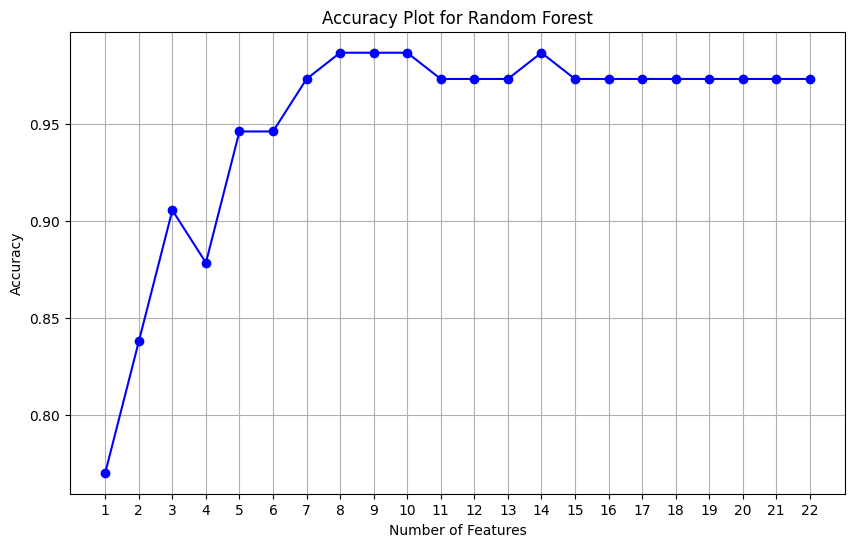

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of 22 accuracy values
accuracies = [test_accuracy1,test_accuracy2,test_accuracy3,test_accuracy4,test_accuracy5,test_accuracy6,test_accuracy7,test_accuracy8,test_accuracy9,test_accuracy10,test_accuracy11,test_accuracy12,test_accuracy13,test_accuracy14,test_accuracy15,test_accuracy16, test_accuracy17, test_accuracy18, test_accuracy19, test_accuracy20, test_accuracy21, test_accuracy22]
print(test_accuracy1,test_accuracy2,test_accuracy3,test_accuracy4,test_accuracy5,test_accuracy6,test_accuracy7,test_accuracy8,test_accuracy9,test_accuracy10,test_accuracy11,test_accuracy12,test_accuracy13,test_accuracy14,test_accuracy15,test_accuracy16, test_accuracy17, test_accuracy18, test_accuracy19, test_accuracy20, test_accuracy21, test_accuracy22)
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 23), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy Plot for Random Forest')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks(range(1, 23, 1))
plt.grid(True)
plt.show()
